# DATA 601: HW4

**Learning Objectives**

- Work with realworld datasets that can be represented using tabular data structures.
- Gain experience wrangling and organizing data using `pandas`.
- Produce visualizations summarizing information from tabular data.

_This is an individual homework assignment._ 

Please complete this homework assignment within the Jupypter notebook environment, and provide your answers where indicated.

#### Submission 

Your submission will be manually tested and graded. In order to ensure that everything goes smoothly, please ensure that: 

- your notebook runs on the Data Science Hub environment, 
- you have provided your solutions where asked without altering any other parts of this notebook,

_You do not need to submit the datasets provided for this homework._


## Dataset

In this homework, you will be working with a building utility usage dataset that contains usage data for six buildings at the University of Calgary over a period of three years. The data has been made available by the [Office of Sunstainability](https://www.ucalgary.ca/sustainability/campus-learning-lab) at the University of Calgary specifically for use in DATA 601. 

_Please do not share the data with anyone in any form_.

The original data is in excel format and contains a hierarchical index. For this assignment, you will be working with a slightly modified version where the building names have been anonymized and the hierarchical index has been flattended into a [tidy format](https://r4ds.had.co.nz/tidy-data.html). The resulting dataset is available on D2L in CSV format.

<!-- BEGIN QUESTION -->

## TASK 0

### Read the Dataset

- Please ensure that the data is available to you locally on the machine you are working on. 
- Read the data using `pandas`, display the head and tail of the data and familiarize yourself with the variables contained in the dataset. 

In [158]:
# Use this cell to collect package imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from matplotlib.ticker import FormatStrFormatter


In [168]:
# Read the data into a pandas dataframe and display the head and tail

df = pd.read_csv('Building Data.csv', thousands=',', parse_dates=['Date'])
display(df.head())
display(df.tail())
display(df.dtypes)
df.info()


,Date,Building,Chilled Water (kWh),Cooling (kWh),Domestic Cold Water (m3),Electricity (kWh),Heating (kWh),Heating Water (kWh),Natural Gas (kWh)
0,2018-10-01,B1,NaN,4920.66,6.39,13240.10,16244.46,NaN,1319.45
1,2018-10-01,B2,NaN,4258.32,89.69,13846.41,50505.60,NaN,2427.78
2,2018-10-01,B3,0.00,NaN,70.10,7181.70,NaN,12147.23,0.00
3,2018-10-01,B4,0.00,NaN,38.10,9500.00,NaN,8177.78,0.00
4,2018-10-01,B5,383.92,NaN,25.18,2038.85,NaN,3388.89,0.00


,Date,Building,Chilled Water (kWh),Cooling (kWh),Domestic Cold Water (m3),Electricity (kWh),Heating (kWh),Heating Water (kWh),Natural Gas (kWh)
6571,2021-09-30,B2,NaN,6031.4,33.30,25053.89,9341.67,NaN,5.56
6572,2021-09-30,B3,27630.74,NaN,23.10,4035.63,NaN,4536.11,0.00
6573,2021-09-30,B4,5049.75,NaN,1.30,5308.12,NaN,6591.68,0.00
6574,2021-09-30,B5,1310.03,NaN,26.18,2111.07,NaN,988.89,0.00
6575,2021-09-30,B6,1523.97,NaN,1.00,3263.78,NaN,0.00,0.00


Date                        datetime64[ns]
Building                            object
Chilled Water (kWh)                float64
Cooling (kWh)                      float64
Domestic Cold Water (m3)           float64
Electricity (kWh)                  float64
Heating (kWh)                      float64
Heating Water (kWh)                float64
Natural Gas (kWh)                  float64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6576 entries, 0 to 6575
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      6576 non-null   datetime64[ns]
 1   Building                  6576 non-null   object        
 2   Chilled Water (kWh)       4384 non-null   float64       
 3   Cooling (kWh)             2192 non-null   float64       
 4   Domestic Cold Water (m3)  6572 non-null   float64       
 5   Electricity (kWh)         6576 non-null   float64       
 6   Heating (kWh)             2192 non-null   float64       
 7   Heating Water (kWh)       4384 non-null   float64       
 8   Natural Gas (kWh)         6576 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 462.5+ KB


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## TASK 1

### Data Wrangling

At this stage, it might be helpful to do some data cleaning and wrangling to facilitate the tasks below. 

- Ensure that the numerical values are read in properly. If not, please use an appropiate numerical type to represent columns that contain numerical quantities.
- The `Date` column contains year, month and day information that needs to be parsed as such so that the data can be inspected at yearly, monthly and daily granularities. There are multiple ways of doing this; one way is to separate the year, month and day out into separate columns. You can also build a hierarchical row index with year, month and day as different levels of the index. 
 
 You may find [`pandas.to_datetime()`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) helpful for this task.
 Please also have a look at the documentation for [`pandas.read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). Some helpful type conversions and cleanup can be performed by pandas at the data read stage.

In [161]:
# Use this cell to do any data type conversions. Alternatively, you may want to pass in appropriate 
# arguments when reading in data above to ensure that the types are inferred correctly.
# Do any conversions needed and then print out the `dtypes` for the non-date columns. 

df.info()
display(df.head())
display(df.filter(['Building', 'Chilled Water (kWh)', 'Cooling (kWh)' ,'Domestic Cold Water (m3)', 'Electricity (kWh)','Heating (kWh)','Heating Water (kWh)','Natural Gas (kWh)']).dtypes)
#I did the conversions when reading the csv fiel. By using thousands=','
#All the numerical values that has object types has been convered to float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6576 entries, 0 to 6575
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      6576 non-null   datetime64[ns]
 1   Building                  6576 non-null   object        
 2   Chilled Water (kWh)       4384 non-null   float64       
 3   Cooling (kWh)             2192 non-null   float64       
 4   Domestic Cold Water (m3)  6572 non-null   float64       
 5   Electricity (kWh)         6576 non-null   float64       
 6   Heating (kWh)             2192 non-null   float64       
 7   Heating Water (kWh)       4384 non-null   float64       
 8   Natural Gas (kWh)         6576 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 462.5+ KB


,Date,Building,Chilled Water (kWh),Cooling (kWh),Domestic Cold Water (m3),Electricity (kWh),Heating (kWh),Heating Water (kWh),Natural Gas (kWh)
0,2018-10-01,B1,NaN,4920.66,6.39,13240.10,16244.46,NaN,1319.45
1,2018-10-01,B2,NaN,4258.32,89.69,13846.41,50505.60,NaN,2427.78
2,2018-10-01,B3,0.00,NaN,70.10,7181.70,NaN,12147.23,0.00
3,2018-10-01,B4,0.00,NaN,38.10,9500.00,NaN,8177.78,0.00
4,2018-10-01,B5,383.92,NaN,25.18,2038.85,NaN,3388.89,0.00


Building                     object
Chilled Water (kWh)         float64
Cooling (kWh)               float64
Domestic Cold Water (m3)    float64
Electricity (kWh)           float64
Heating (kWh)               float64
Heating Water (kWh)         float64
Natural Gas (kWh)           float64
dtype: object

In [162]:
# Use this cell to do any wrangling on the date column. Then display the resulting dataframe

#I did the conversions when reading the csv fiel, by using parse_dates
#The tpye of Date has been convered form int to datetime64[ns]

#Separating the year, month and day out into separate columns
df['year']= df['Date'].dt.year
df['month']= df['Date'].dt.month
df['day']= df['Date'].dt.day
display(df.head())
display(df.tail())
display(df.filter(['Date']).dtypes)


,Date,Building,Chilled Water (kWh),Cooling (kWh),Domestic Cold Water (m3),Electricity (kWh),Heating (kWh),Heating Water (kWh),Natural Gas (kWh),year,month,day
0,2018-10-01,B1,NaN,4920.66,6.39,13240.10,16244.46,NaN,1319.45,2018,10,1
1,2018-10-01,B2,NaN,4258.32,89.69,13846.41,50505.60,NaN,2427.78,2018,10,1
2,2018-10-01,B3,0.00,NaN,70.10,7181.70,NaN,12147.23,0.00,2018,10,1
3,2018-10-01,B4,0.00,NaN,38.10,9500.00,NaN,8177.78,0.00,2018,10,1
4,2018-10-01,B5,383.92,NaN,25.18,2038.85,NaN,3388.89,0.00,2018,10,1


,Date,Building,Chilled Water (kWh),Cooling (kWh),Domestic Cold Water (m3),Electricity (kWh),Heating (kWh),Heating Water (kWh),Natural Gas (kWh),year,month,day
6571,2021-09-30,B2,NaN,6031.4,33.30,25053.89,9341.67,NaN,5.56,2021,9,30
6572,2021-09-30,B3,27630.74,NaN,23.10,4035.63,NaN,4536.11,0.00,2021,9,30
6573,2021-09-30,B4,5049.75,NaN,1.30,5308.12,NaN,6591.68,0.00,2021,9,30
6574,2021-09-30,B5,1310.03,NaN,26.18,2111.07,NaN,988.89,0.00,2021,9,30
6575,2021-09-30,B6,1523.97,NaN,1.00,3263.78,NaN,0.00,0.00,2021,9,30


Date    datetime64[ns]
dtype: object

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## TASK 2

### Exploring the Data for 2019

For this task, you will be working with usage data for the year 2019. For the year 2019, manipulate your dataframe to extract and visualize the following information:
1. Electricity usage per building for the entire year.
2. Total energy usage per building for the entire year. To determine total energy usage, add the variables that are in `kWh` units.
3. Box plots showing the daily energy usage (aggregated over the buildings) per month. As in the previous task, add the variables that are in `kWh` units to determine daily totals. 

For the tasks above where the type visualization is not clearly spelled out,  please choose an appropriate visualization that clearly shows the requested information. Please also ensure that you provide appropriate labels/legends/colorbars so that your visualizations are readable and self-contained.

,Date,Building,Chilled Water (kWh),Cooling (kWh),Domestic Cold Water (m3),Electricity (kWh),Heating (kWh),Heating Water (kWh),Natural Gas (kWh),month,day
552,2019-01-01,B1,NaN,4478.13,0.01,12166.02,14030.57,NaN,0.00,1,1
553,2019-01-01,B2,NaN,3918.36,38.97,10089.52,35480.58,NaN,144.44,1,1
554,2019-01-01,B3,0.00,NaN,0.00,5981.38,NaN,9538.90,0.00,1,1
555,2019-01-01,B4,0.00,NaN,0.20,8459.28,NaN,3622.23,0.00,1,1
556,2019-01-01,B5,363.41,NaN,12.50,1683.52,NaN,1772.22,0.00,1,1
557,2019-01-01,B6,0.00,NaN,0.00,3844.01,NaN,16425.01,408.33,1,1


Building
B1    4178192.04
B2    9172640.37
B3    1669895.96
B4    2668782.35
B5     671564.38
B6    1277728.52
Name: Electricity (kWh), dtype: float64


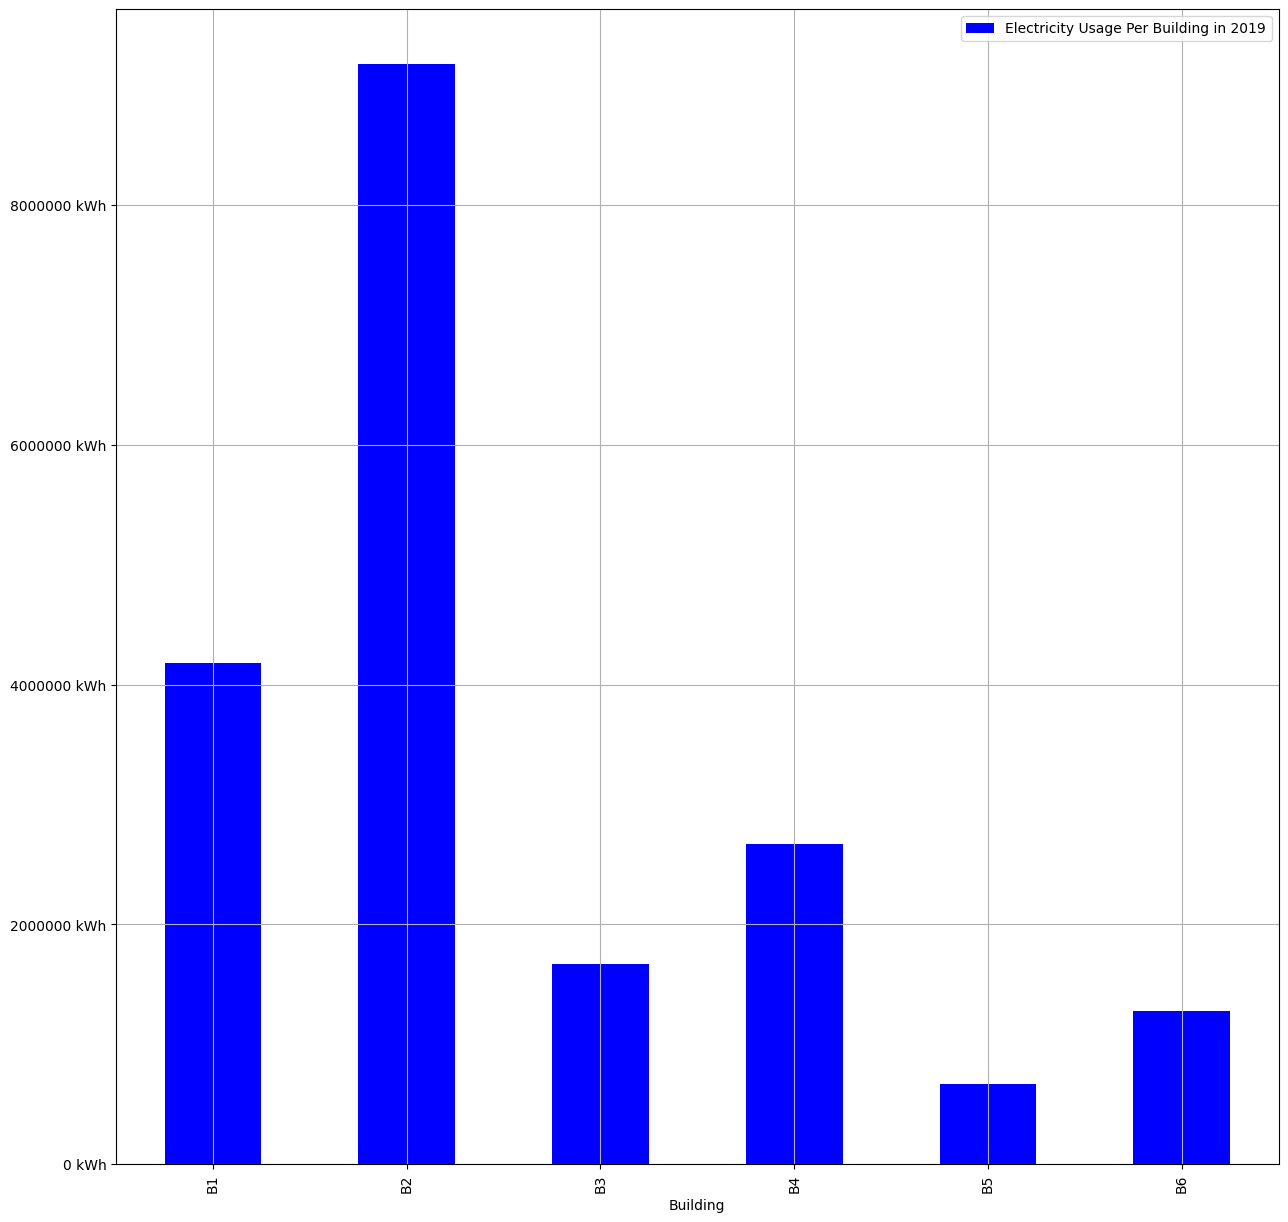

In [163]:
# Solution for 1.
df19 = df[df.year == 2019]
df19 = df19.drop('year', axis=1)

display(df19.head(6))
dfele = df19.groupby('Building')['Electricity (kWh)'].sum()
print(dfele)

dfele.name = "Electricity Usage Per Building in 2019"
fig = plt.figure()
plt.ticklabel_format(style = 'plain')
dfele.plot(kind='bar', color='b', grid=True)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d kWh'))
plt.legend( );
plt.show()

/tmp/ipykernel_111/456701765.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfene = df19.groupby(by = 'Building').sum()


Building
B1    11219206.15
B2    20218399.92
B3     6198993.32
B4     5751404.75
B5     1681844.76
B6     6511199.51
Name: energy, dtype: float64

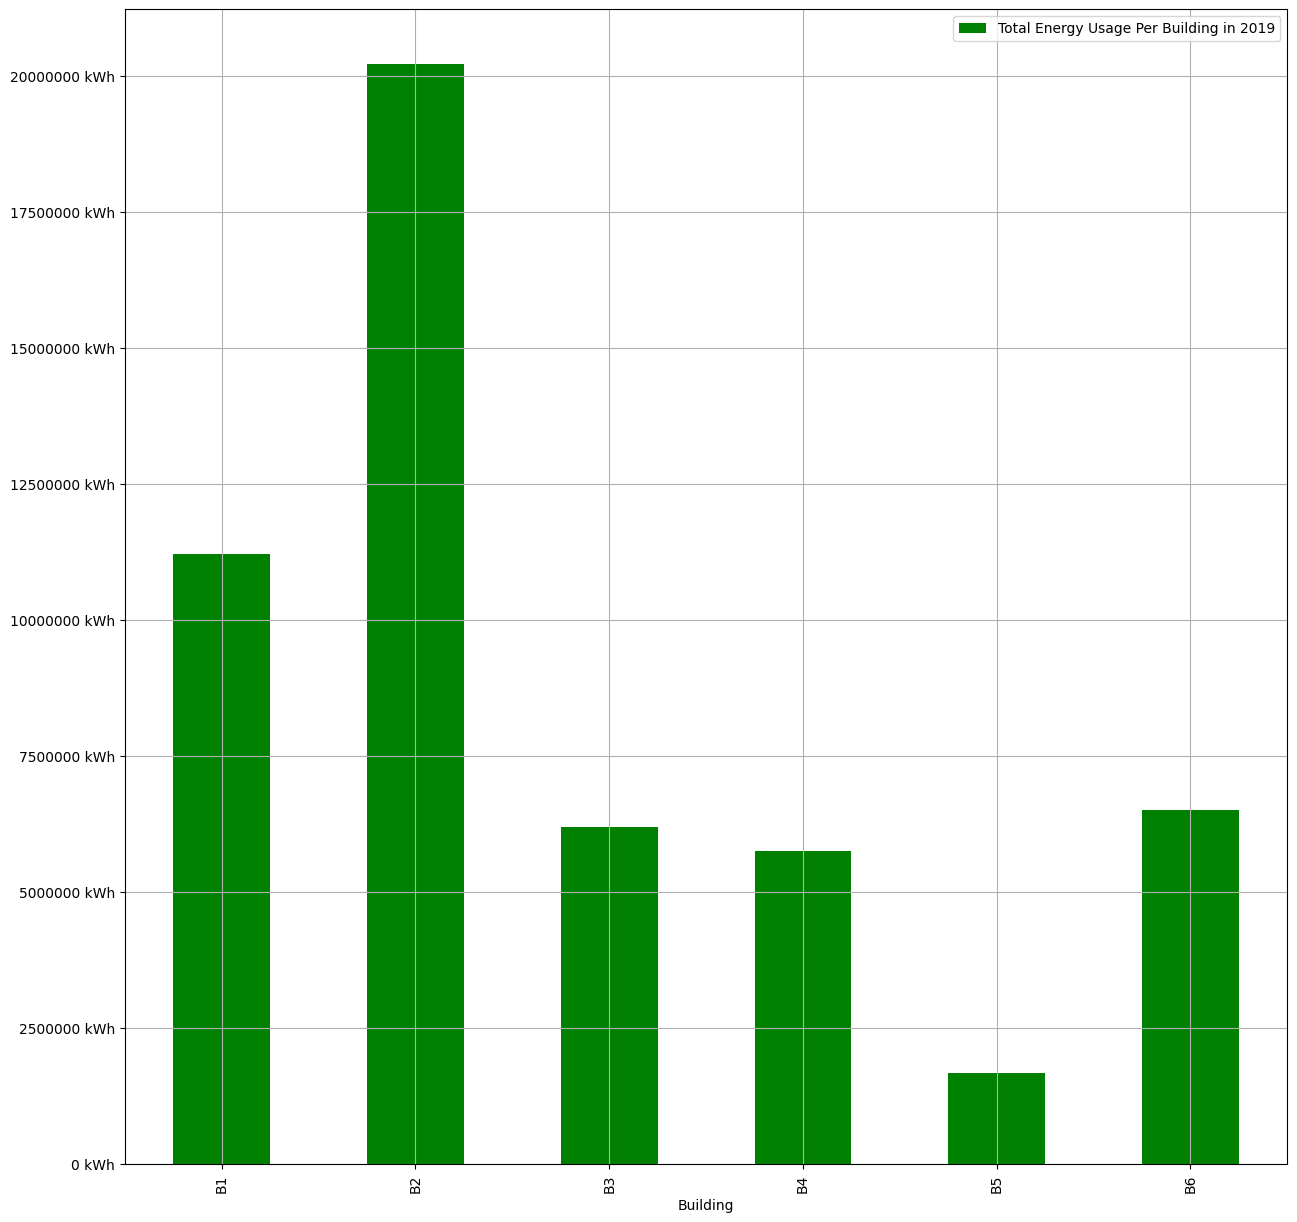

In [172]:
# Solution for 2.

dfene = df19.groupby(by = 'Building').sum()
dfene = dfene.drop(columns=['month', 'day'])

#display(dfene)
dfene['energy'] = dfene.loc[:,['Chilled Water (kWh)','Cooling (kWh)', 'Electricity (kWh)', 'Heating (kWh)', 'Heating Water (kWh)', 'Natural Gas (kWh)']].sum(axis=1)
display(dfene['energy'])

dfene['energy'].name = "Total Energy Usage Per Building in 2019"
fig = plt.figure()
plt.ticklabel_format(style = 'plain')
dfene['energy'].plot(kind='bar', color='g', grid=True)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d kWh'))

plt.legend( );
plt.show()

/tmp/ipykernel_111/1967487742.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3 = df19.groupby(['month','day','Building']).sum()


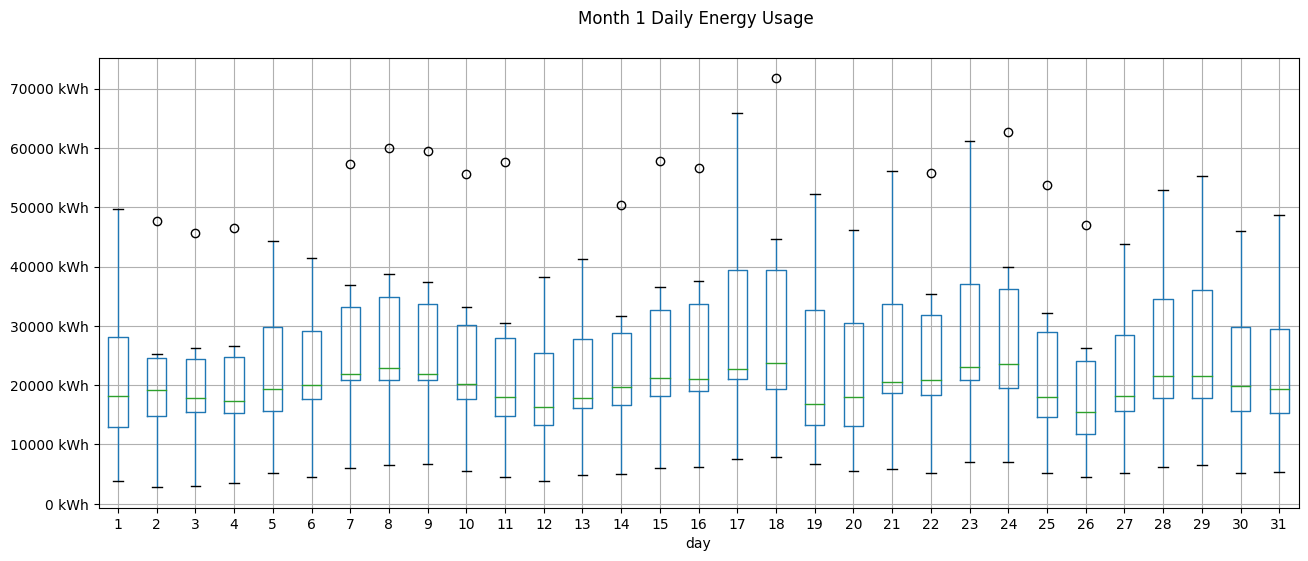

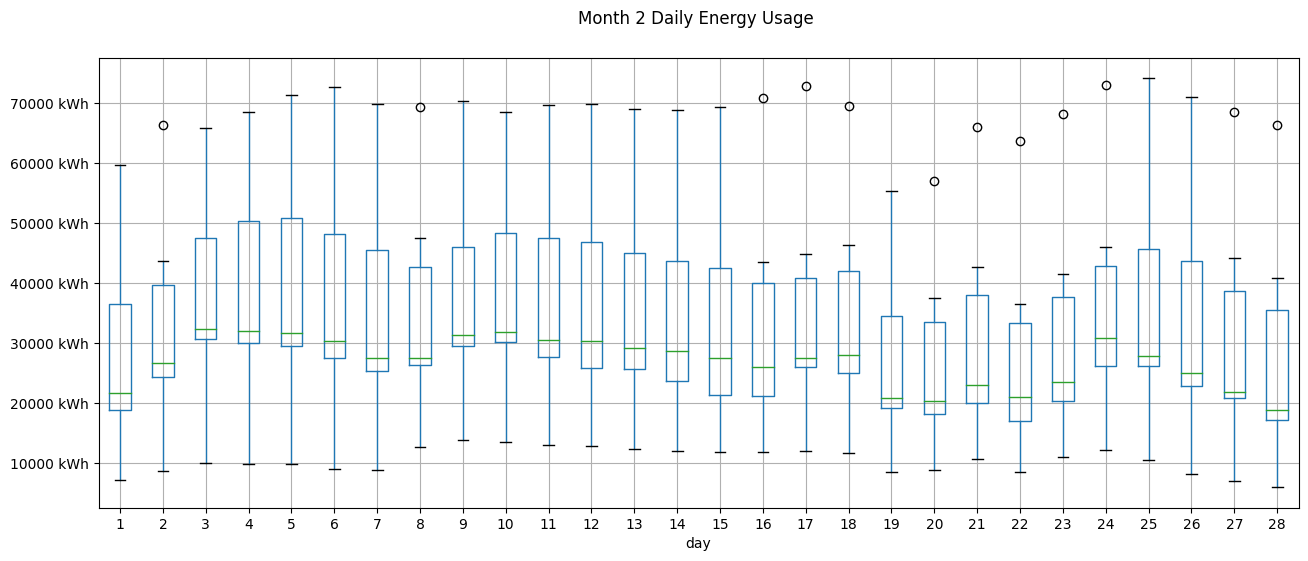

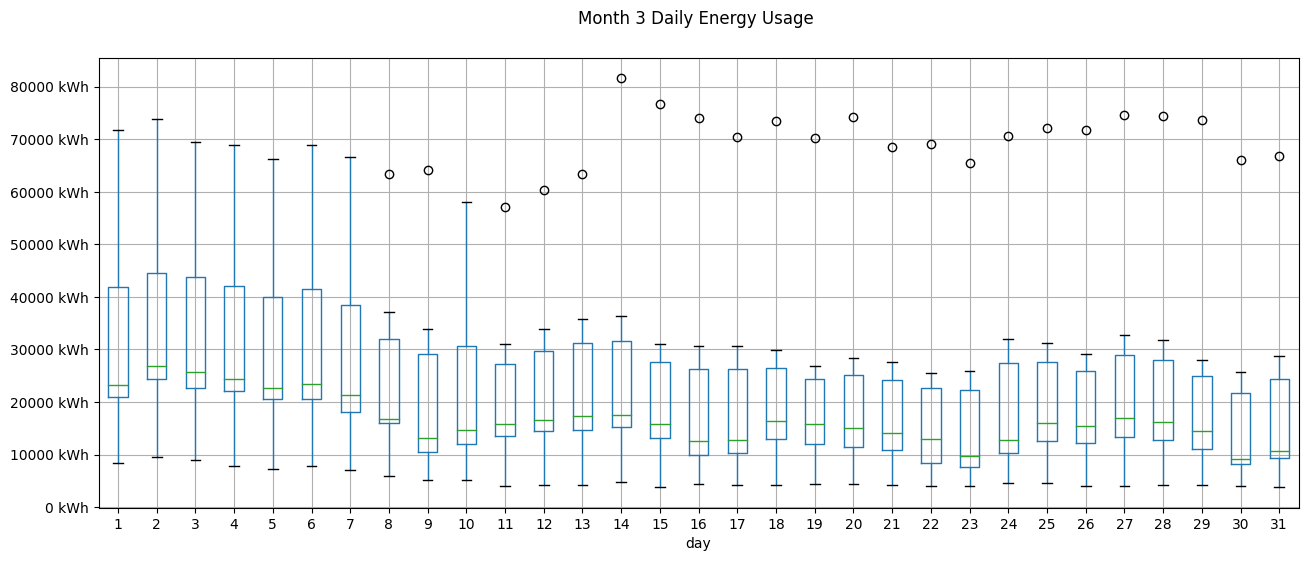

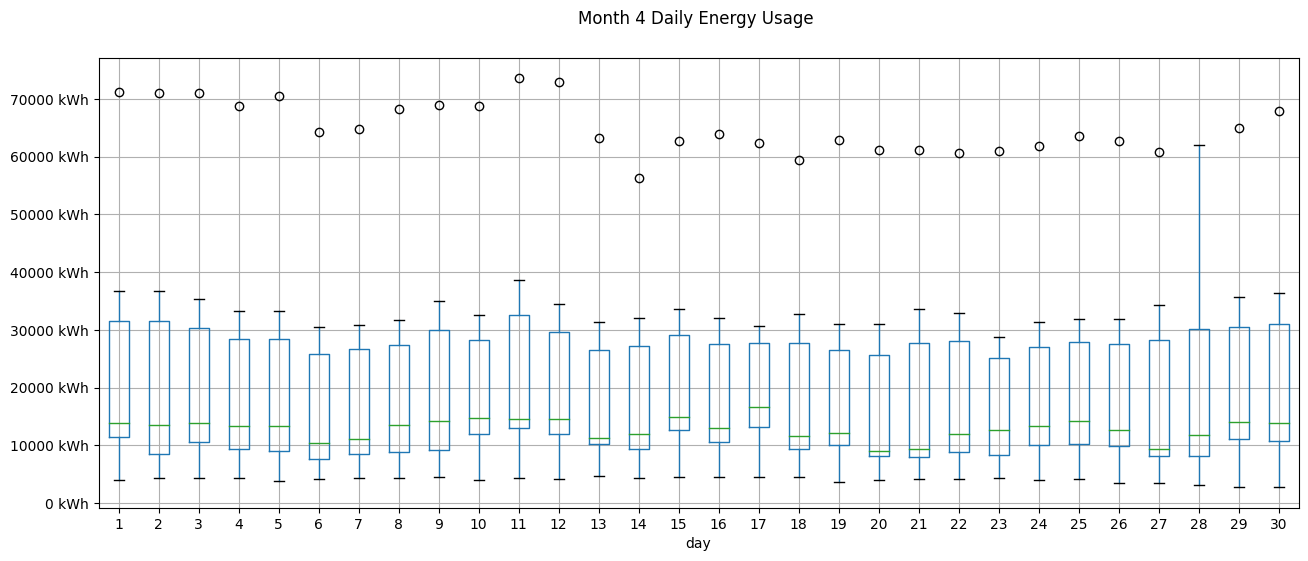

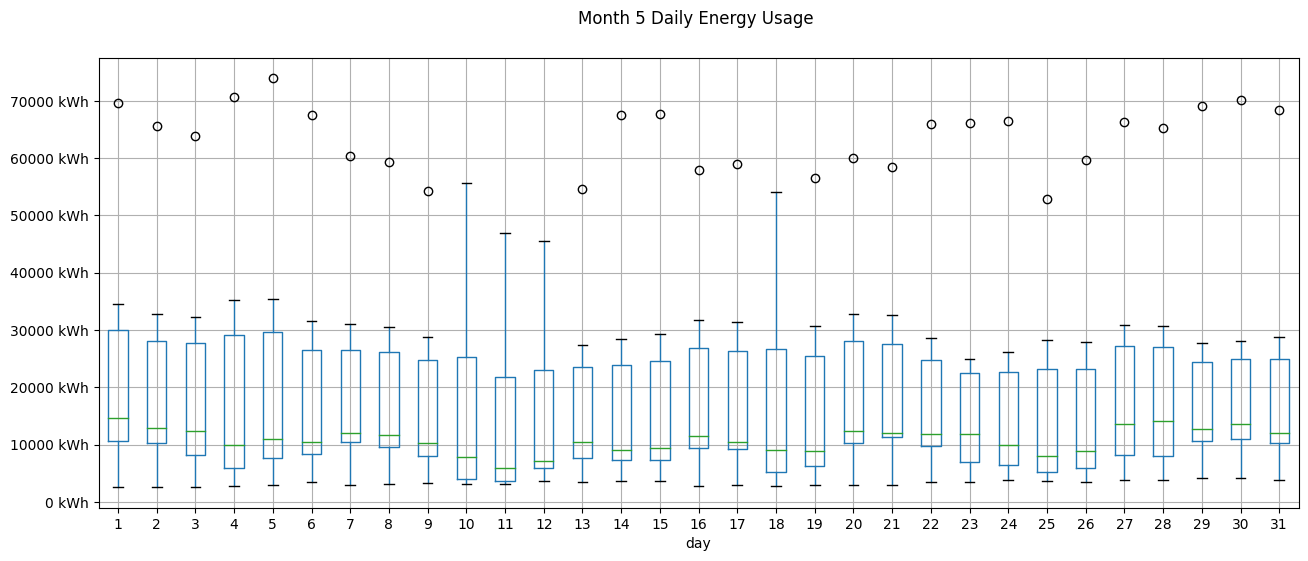

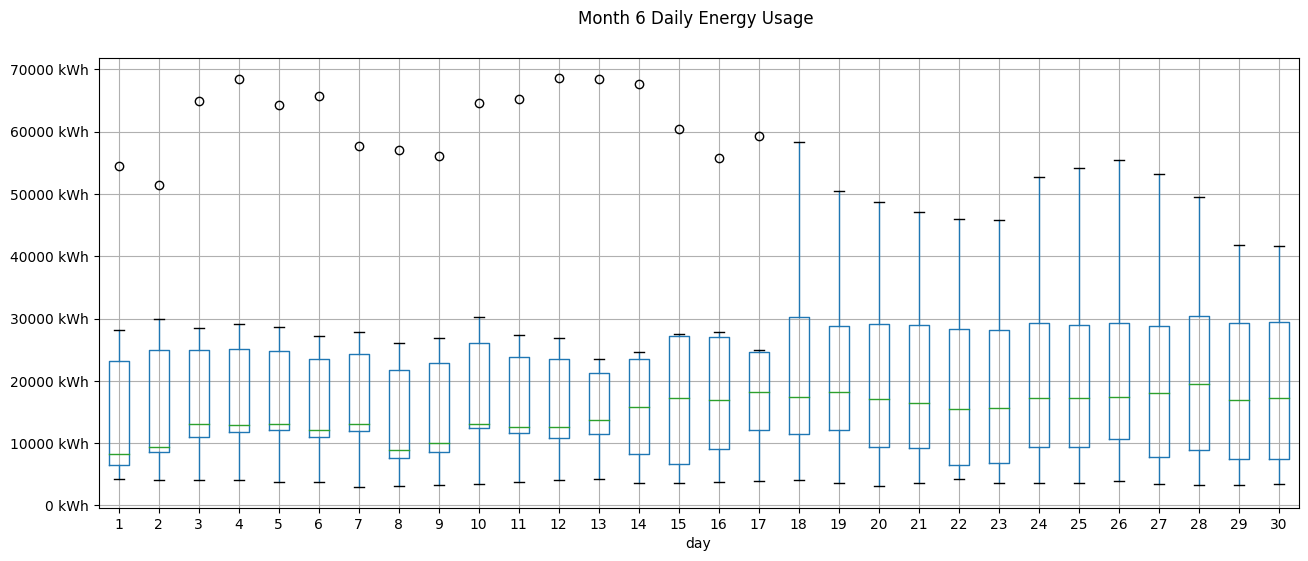

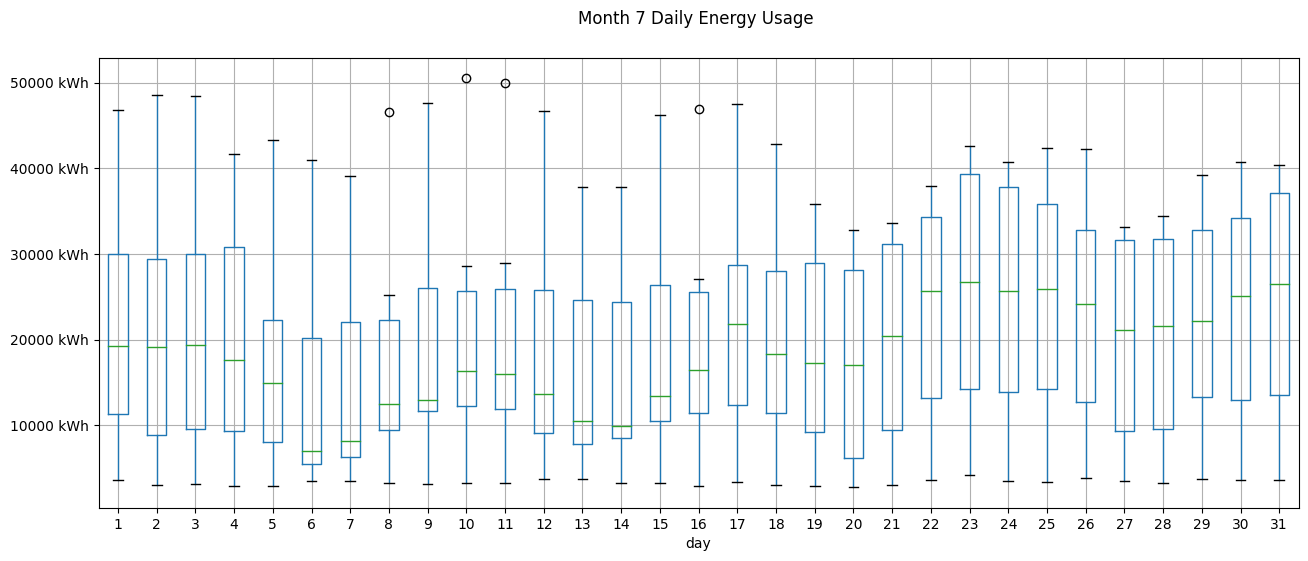

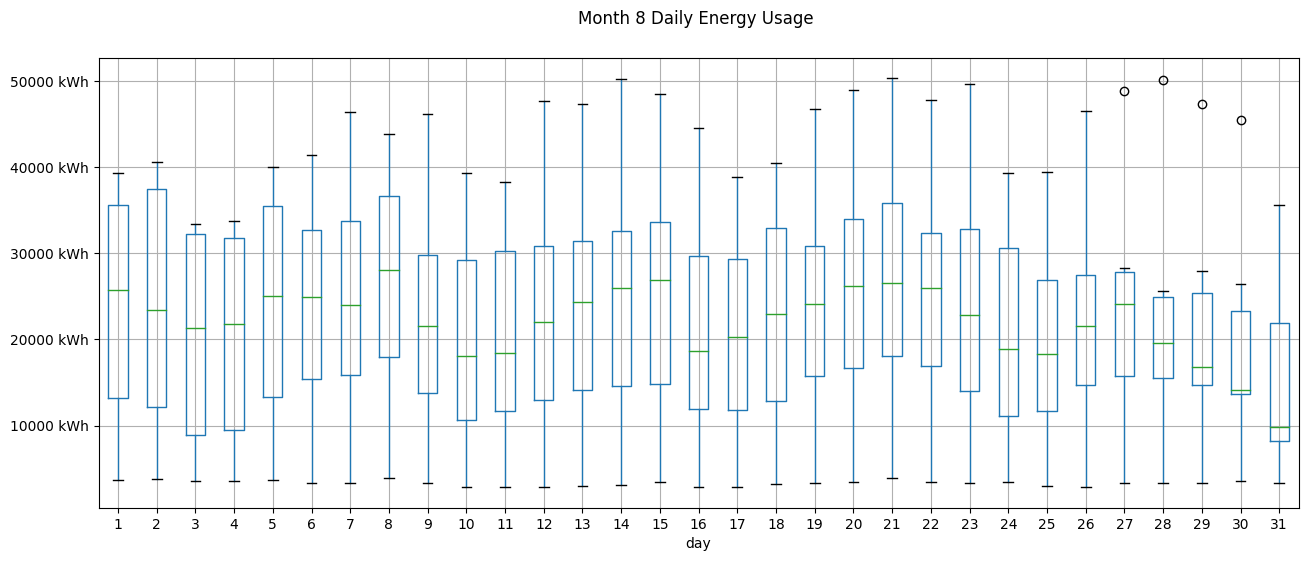

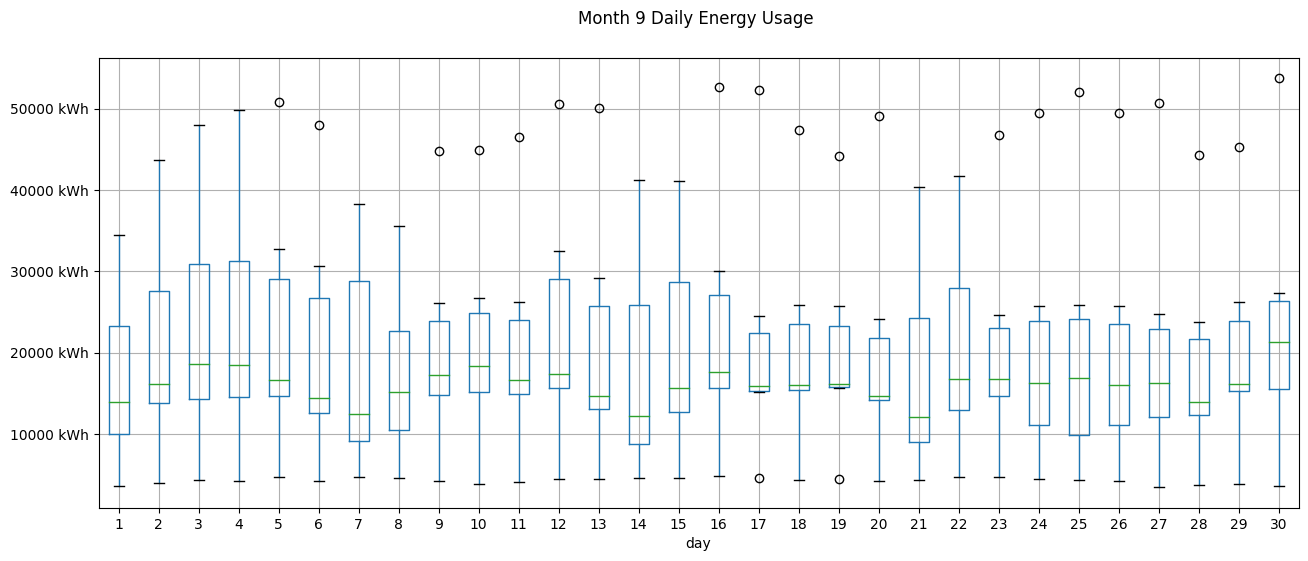

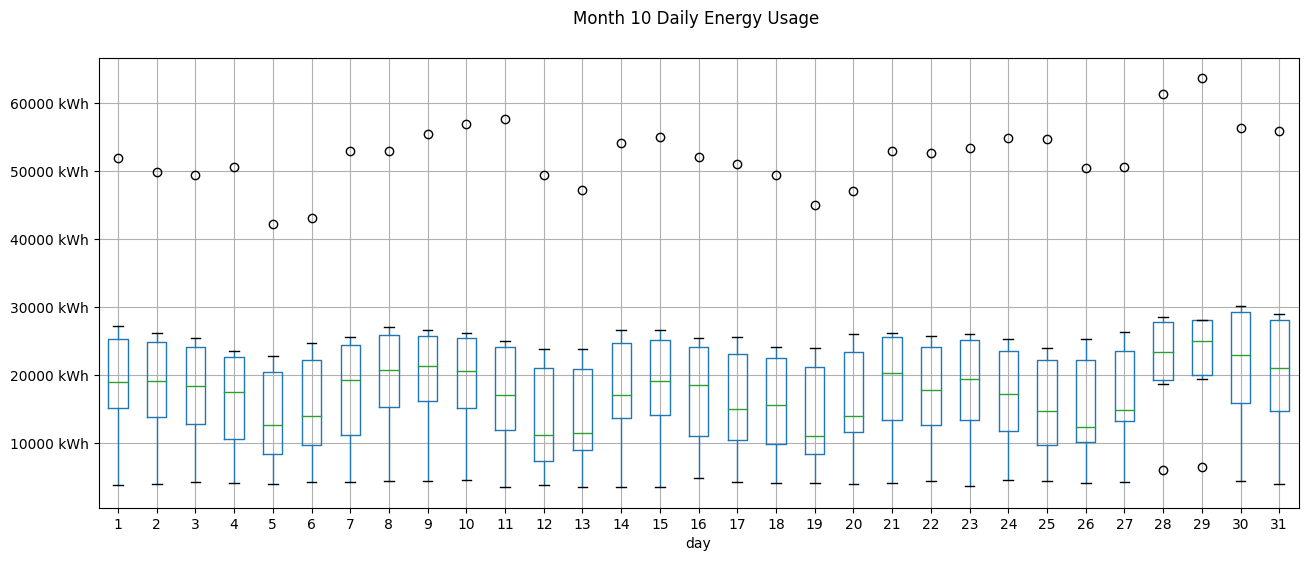

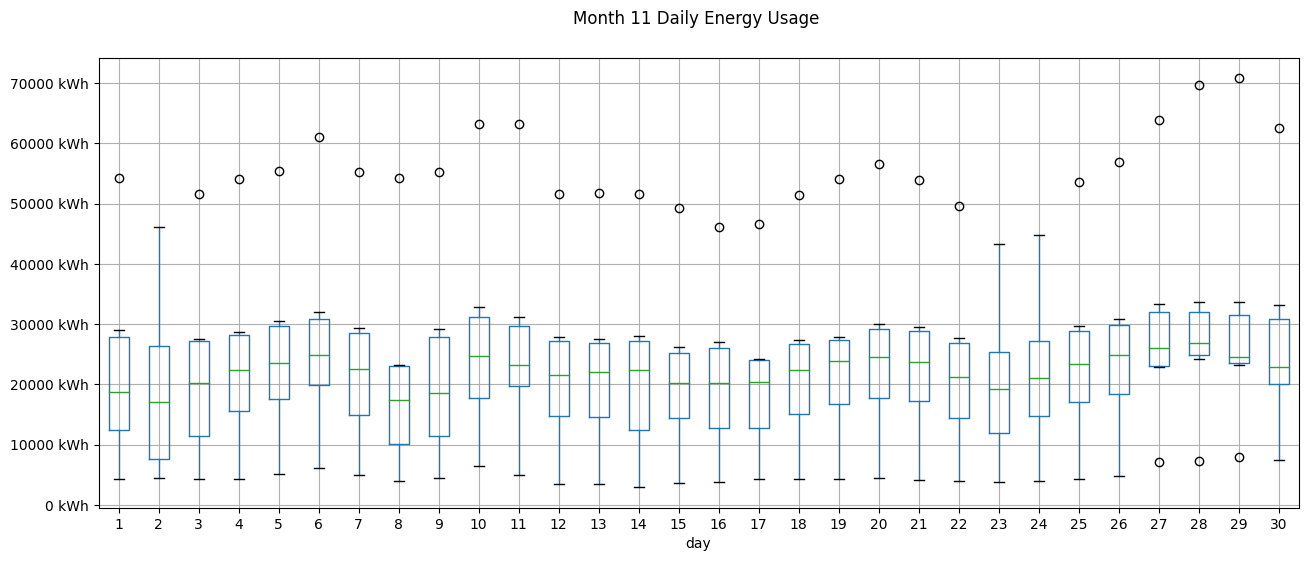

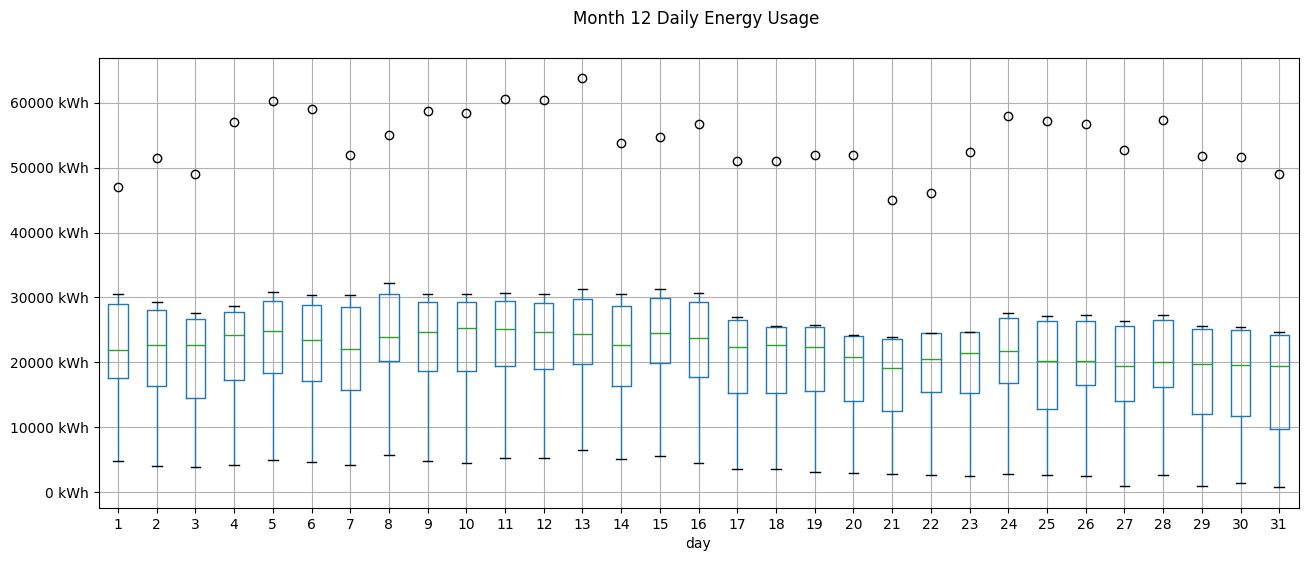

In [165]:
# Solution for 3.
df3 = df19.groupby(['month','day','Building']).sum()
#display(df3)

df3['energy'] = df3.loc[:,['Chilled Water (kWh)','Cooling (kWh)', 'Electricity (kWh)', 'Heating (kWh)', 'Heating Water (kWh)', 'Natural Gas (kWh)']].sum(axis=1)
#df3 = df3.drop(columns=['Domestic Cold Water (m3)','Chilled Water (kWh)','Cooling (kWh)', 'Electricity (kWh)', 'Heating (kWh)', 'Heating Water (kWh)', 'Natural Gas (kWh)'])
thisdata = df3[['energy']]
#display(thisdata)

#print(thisdata)

for monthn, eachmonth in thisdata.groupby('month'):
    #display(monthn)
    #display(eachmonth)
    eachmonth.boxplot(by='day', column='energy', figsize = (15,6))
    plt.suptitle('Month {} Daily Energy Usage '.format(monthn))
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d kWh'))
    plt.title('')
    #break
#thisdata.info()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## TASK 3

### Exploring trends over time

You may approach this task however you see fit. We expect appropriate use of visualizations and summary statistics, and textual explanations of your approach and findings following your code.

Consider the energy usage for each building over the entire timeframe available. Address the following questions:
- How does use of natural gas and electricity compare between buildings? Comment on magnitude and variance of usage.
- Can you identify any impacts of the pandemic on energy usage? Reflect on why/why not.

Natural Gas Useg                                   
Building                 B1        B2   B3   B4   B5        B6
year month                                                    
2018 10            38697.28  72952.85  0.0  0.0  0.0   4725.01
     11                0.00  66094.50  0.0  0.0  0.0   6470.87
     12                0.00  41477.83  0.0  0.0  0.0   9043.04
2019 1                 0.00   7991.67  0.0  0.0  0.0   9380.56
     2                 0.00  67833.38  0.0  0.0  0.0  13211.10
     3                 0.00  52197.25  0.0  0.0  0.0   8713.88
     4            170141.80  70769.48  0.0  0.0  0.0   3851.42
     5            173997.38  62877.80  0.0  0.0  0.0   2429.15
     6            170600.13  11855.55  0.0  0.0  0.0    280.55
     7            188958.45    883.32  0.0  0.0  0.0    113.89
     8            184702.93    580.52  0.0  0.0  0.0    436.12
     9            172819.59   2002.80  0.0  0.0  0.0      2.78
     10           168269.60  83613.95  0.0  0.0  0.0      0.00
     11           162861.28  81952.82  0.0  0.0  0.0      5.56
     12           166725.11  58444.52  0.0  0.0  0.0   3183.34
2020 1            199969.62  74825.04  0.0  0.0  0.0   8394.47
     2            192986.29  38808.34  0.0  0.0  0.0   5533.33
     3            209085.14   7144.44  0.0  0.0  0.0   6299.98
     4            164939.72    936.12  0.0  0.0  0.0   4079.18
     5            175715.22    159.77  0.0  0.0  0.0   1441.67
     6            175063.44     19.45  0.0  0.0  0.0    125.01
     7            179934.44     72.23  0.0  0.0  0.0      0.00
     8            184017.10      0.00  0.0  0.0  0.0      0.00
     9            173205.96    127.78  0.0  0.0  0.0      2.78
     10           168906.66   2805.58  0.0  0.0  0.0      5.56
     11           160583.44   2050.01  0.0  0.0  0.0   4172.23
     12           170545.38    447.23  0.0  0.0  0.0   8877.77
2021 1            165987.77    458.34  0.0  0.0  0.0   8294.45
     2            147860.69   2005.57  0.0  0.0  0.0   7724.99
     3            165742.64    469.46  0.0  0.0  0.0   2666.66
     4            163290.96     88.89  0.0  0.0  0.0    947.24
     5            173916.82    977.79  0.0  0.0  0.0    155.57
     6            172943.17     41.68  0.0  0.0  0.0      5.56
     7            184722.69    372.23  0.0  0.0  0.0      2.78
     8            176096.62     19.44  0.0  0.0  0.0    141.67
     9            168593.29    127.79  0.0  0.0  0.0      0.00

Electricity Useg                                             \
Building                 B1         B2         B3         B4        B5   
year month                                                               
2018 10           393887.61  372289.36  209686.40  260852.90  63948.54   
     11           374273.69  333300.65  200118.20  264894.75  59941.11   
     12           361703.08  335464.94  183091.98  224587.89  58836.87   
2019 1            383496.58  339463.96  177376.05  276629.53  59395.89   
     2            336581.35  343681.57  153026.79  296037.03  54861.56   
     3            373351.60  697976.63  136890.99  252984.35  62510.68   
     4            337083.31  860025.20  129291.83  228730.86  58458.81   
     5            328966.69  833999.32  127188.06  160574.27  55441.46   
     6            323337.28  776671.82  138888.97  147619.67  52520.73   
     7            346182.84  803897.55  144982.27  191746.16  49630.84   
     8            338571.14  843957.31  146900.71  207597.42  50649.44   
     9            336561.15  857390.68  121510.29  229511.95  61109.65   
     10           380875.51  941863.12  134504.06  221578.95  63778.53   
     11           347819.00  943323.34  132035.68  225350.45  60113.81   
     12           345365.59  930389.87  127300.26  230421.71  43092.98   
2020 1            368174.53  984930.82  144028.33  220925.66  49190.44   
     2            351065.46  869629.82  127991.76  189307.72  55743.76   
     3            341894.89  819526.24  130369.26  185044.64  60344.37   
     4            292516.34  716124.10  104223.51  152865.27  57009.97   
     5            299184.57  710348.85   97531.60  143990.32  57162.11   
     6            299055.12  703112.91  124626.02  132991.24  53765.86   
     7            343617.36  736961.66  157812.50  186520.01  50500.56   
     8            350533.16  757755.93  159298.88  200530.15  49352.36   
     9            343489.82  756796.53  160057.92  201524.94  48974.17   
     10           377123.53  803784.85  164051.32  210410.84  50487.64   
     11           361439.99  779340.10  153581.37  207627.98  49268.23   
     12           359326.76  776099.64  157538.92  195926.68  49467.96   
2021 1            337701.05  800338.82  160277.35  203753.53  47831.22   
     2            303077.49  774569.63  145029.43  191359.03  43713.96   
     3            341163.08  839505.50  148917.15  204257.08  49236.84   
     4            327192.04  766295.78  136024.56  190698.68  48126.22   
     5            326026.97  789913.48  147355.04  169378.85  48167.23   
     6            314676.84  775781.39  137243.86  157881.16  45103.88   
     7            318860.28  767828.54  150755.04  146614.26  45929.10   
     8            319131.73  747990.93  129941.68  153969.51  48759.19   
     9            321292.16  759678.95  122075.81  157129.08  60029.24   

                       
Building           B6  
year month             
2018 10     118122.72  
     11     113342.67  
     12     109900.10  
2019 1      115506.25  
     2      109592.38  
     3      105420.18  
     4      100358.15  
     5      101856.86  
     6       96161.08  
     7       98994.41  
     8      103710.21  
     9      106023.62  
     10     107916.64  
     11     115108.04  
     12     117080.70  
2020 1      122264.13  
     2      115568.16  
     3      111472.38  
     4       99490.36  
     5      103631.02  
     6       98981.90  
     7      113434.15  
     8      114930.94  
     9      104237.85  
     10     101705.31  
     11     108951.55  
     12     115669.85  
2021 1      118594.01  
     2      106146.94  
     3      115744.31  
     4      112457.67  
     5      116692.37  
     6      110879.39  
     7      111596.90  
     8      104015.21  
     9      102768.34

,Natural Gas Useg Variance
Building,
B1,5.231398e+06
B2,1.775476e+06
B3,0.000000e+00
B4,0.000000e+00
B5,0.000000e+00
B6,2.124259e+04


,Electricity Useg Variance
Building,
B1,1.138270e+06
B2,3.651786e+07
B3,8.532620e+05
B4,3.069980e+06
B5,7.636583e+04
B6,1.301121e+05


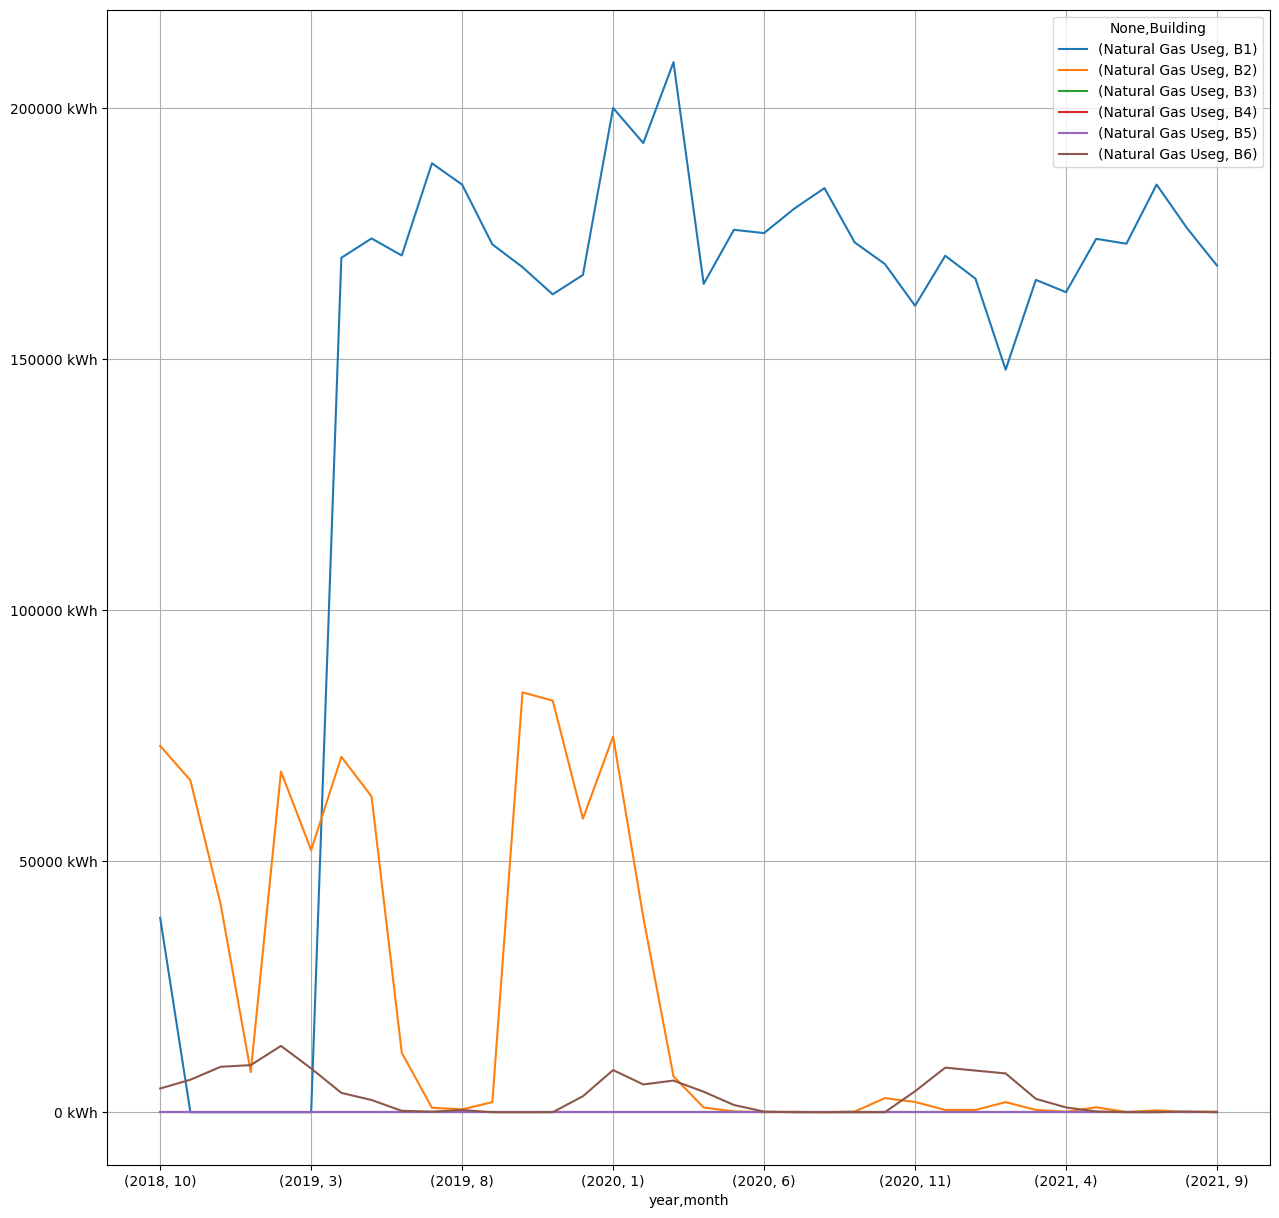

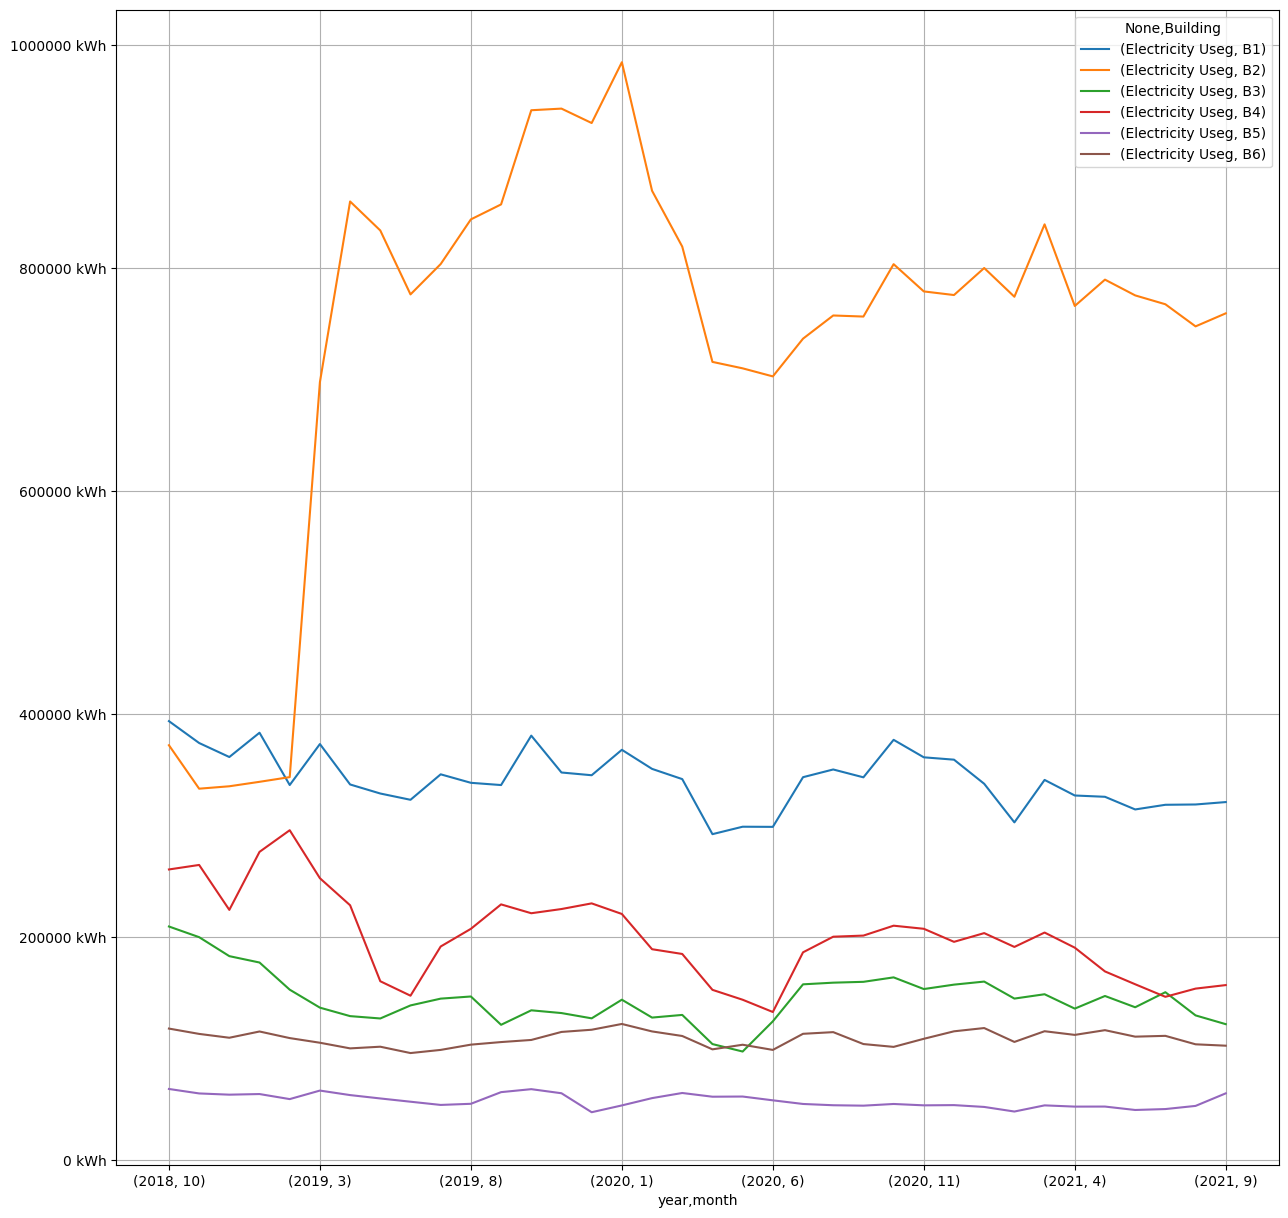

In [166]:
# Solution for 1.

#Ploting the trends of natural gas useg compare between buildings per month.
t3gasdata = pd.DataFrame({'Building' : df['Building'], 'Natural Gas Useg' : df['Natural Gas (kWh)'] , 'year' : df['year'],'month' : df['month']})
#the magnitude
gasgrouped = t3gasdata.groupby(['year', 'month','Building']).sum()
finframe1 = gasgrouped.unstack()
display(finframe1)

plt.rcParams["figure.figsize"] = (15,15)
finframe1.plot(kind='line', grid=True)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d kWh'))


#Ploting the trends of electricity useg compare between buildings per month.
t3eledata = pd.DataFrame({'Building' : df['Building'], 'Electricity Useg' : df['Electricity (kWh)'] , 'year' : df['year'],'month' : df['month']})
#the magnitude
elegrouped = t3eledata.groupby(['year', 'month','Building']).sum()
finframe2 = elegrouped.unstack()
display(finframe2)

plt.rcParams["figure.figsize"] = (15,15)
finframe2.plot(kind='line', grid=True)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d kWh'))


#the variance
t3gdatavar = pd.DataFrame({ 'Building' : df['Building'], 'Natural Gas Useg Variance' : df['Natural Gas (kWh)'] })
gasgroupedvar = t3gdatavar.groupby(['Building']).var()
display(gasgroupedvar)


t3eledatavar = pd.DataFrame({ 'Building' : df['Building'], 'Electricity Useg Variance' : df['Electricity (kWh)'] })
elegroupedvar = t3eledatavar.groupby(['Building']).var()
display(elegroupedvar)

#I use line plot to show the usegs of natural gas and electricity compare between buildings.

#Before April 2019 Building 2 has the highest usegs of Natural Gas. After that, the natural gas useg of building 1 is significantly higher than other buildings.
#The building 1 has the largest variance of the natural gas useg.
#Building 3, building 4 and building5 have no useg of natural gas.

#Overall,  Building 2 has the highest electricity useg of all buildings.
#Electricity consumption trends are relatively flat for all buildings except Building 2. The building 2 has the largest variance of the Electricity useg.
#Building 5 has the lowest variance which shows in the plot aswell.
#And all buildings show a similar trend in electricity consumption except Building 2.

Total Energy Useg                                                \
Building                  B1          B2          B3         B4         B5   
year month                                                                   
2018 10            957402.59  1787150.84   470269.97  440269.71  154677.00   
     11            968375.63  1695809.35   541810.14  498736.61  131123.24   
     12           1013004.63  1671508.16   572856.18  468015.86  156397.82   
2019 1            1064862.70  1628484.74   535204.10  561893.63  168797.20   
     2            1322237.12  1904555.15   671055.00  726470.71  292596.12   
     3            1071021.66  2145577.34   447041.23  524612.37  161662.45   
     4             995696.06  1951890.73   307936.41  348878.18  121794.76   
     5             934798.41  1918906.37   291647.64  252785.15  101697.82   
     6             779148.98  1695696.35   634576.46  292222.22  110453.46   
     7             930847.19  1293136.82   726952.18  416959.55  104130.91   
     8             965624.46  1350129.93   872326.29  526600.47  103721.65   
     9             845167.15  1387588.32   418474.40  453692.66  128704.17   
     10            794083.56  1619153.10   370395.94  472128.19  131790.52   
     11            756804.87  1641701.47   463949.82  551959.04  142643.90   
     12            758913.99  1681579.60   459433.85  623202.58  113851.80   
2020 1             799423.26  1897711.93   631359.25  623248.19  169372.77   
     2             881052.66  1475722.94   426994.77  529510.76  138352.79   
     3            1118554.60  1552580.28   470777.86  562647.23  150301.32   
     4             944693.67  1336135.18   323132.01  372412.57  115591.42   
     5             918133.87  1180780.84   166429.55  305882.07  106254.53   
     6             850390.58  1080897.42   124626.02  359413.82  108622.64   
     7             947537.03  1258327.61   558592.09  651765.27  131806.71   
     8             968485.65  1364134.16   981006.62  662622.36  136472.12   
     9             931782.93  1289911.33  1133249.54  630687.86  137958.35   
     10           1110329.93  1430973.11   909125.84  672940.11  169955.39   
     11           1135135.26  1410899.00   590124.80  615241.79  110589.10   
     12           1239331.48  1429935.12   625850.42  590217.09  111293.00   
2021 1            1270573.24  1640187.84   603030.74  670156.44  116776.63   
     2            1409856.36  1790859.27   588251.99  738321.10  163308.50   
     3            1167533.08  1658206.14   500854.94  612508.76   76025.73   
     4            1131017.66  1334048.80   422031.09  542535.22   77631.79   
     5             931726.41  1368720.20   519518.84  539011.57   62645.03   
     6             893889.42  1445530.20   352734.30  586649.34   60735.41   
     7             922634.36  1343192.17   375550.47  540549.44   90733.07   
     8             902663.59  1265692.79   288887.08  519507.24  100048.95   
     9             898017.72  1209343.56   848948.82  449900.02  128777.82   

                       
Building           B6  
year month             
2018 10     560845.29  
     11     594550.00  
     12     602137.97  
2019 1      638039.98  
     2      772362.33  
     3      473092.59  
     4      393293.11  
     5      361603.71  
     6      327676.25  
     7      334130.70  
     8      394779.90  
     9      466589.14  
     10     606302.95  
     11     871558.65  
     12     871770.20  
2020 1      906392.54  
     2      736596.42  
     3      625828.32  
     4      472869.82  
     5      450491.24  
     6      444546.83  
     7      584184.00  
     8      591455.30  
     9      479857.49  
     10     504575.43  
     11     594987.33  
     12     664845.08  
2021 1      694511.13  
     2      671542.62  
     3      662509.52  
     4      620216.40  
     5      605153.81  
     6      577806.13  
     7      583040.88  
     8      467954.36  
     9      384461.50

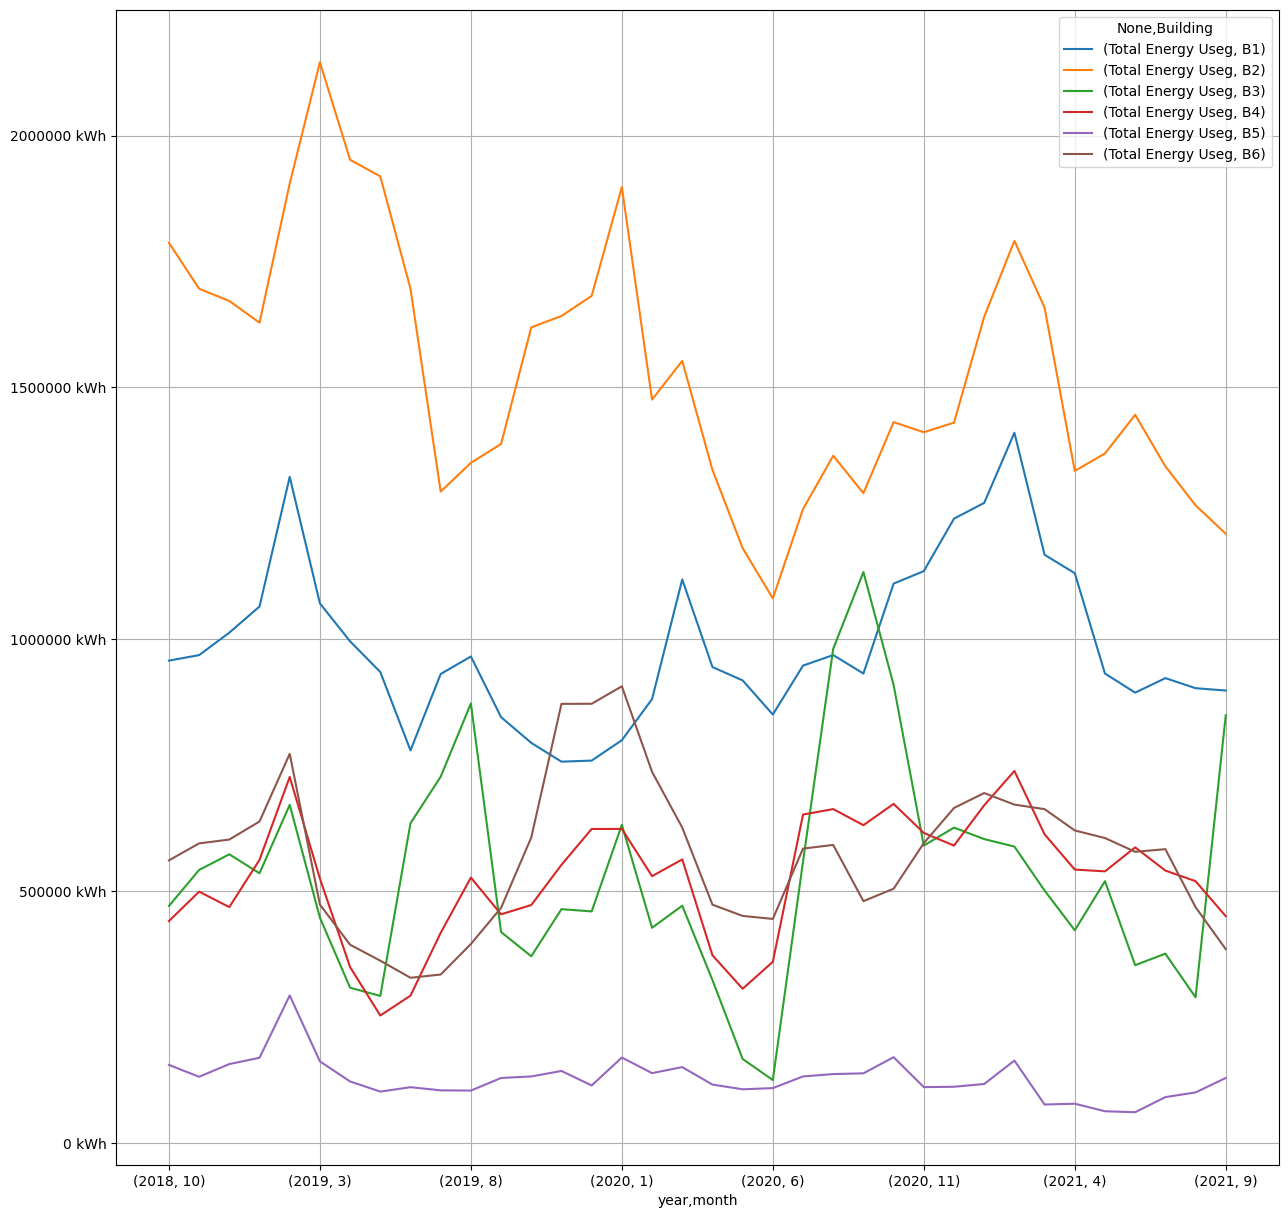

In [167]:
# Solution for 2.


#Ploting trends of total energy useg compare between buildings per month.

dfeng = df[['year','month','Building','Chilled Water (kWh)','Cooling (kWh)', 'Electricity (kWh)', 'Heating (kWh)', 'Heating Water (kWh)', 'Natural Gas (kWh)']]

dfeng = dfeng.groupby(['year','month','Building']).sum()


dfeng['Total Energy Useg'] = dfeng.loc[:,['Chilled Water (kWh)','Cooling (kWh)', 'Electricity (kWh)', 'Heating (kWh)', 'Heating Water (kWh)', 'Natural Gas (kWh)']].sum(axis=1)
dfeng = dfeng[['Total Energy Useg']]
dfeng = dfeng.unstack()
display(dfeng)


plt.rcParams["figure.figsize"] = (15,15)
dfeng.plot(kind='line', grid=True)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d kWh'))

#I can identify the impact of the pandemic on energy usage.
#The plot of trends of total energy useg compare between buildings shows that 
#there is a significant amount of drop of energy useg form March 2020 to June 2020 for all the building excepting building 5.
#In fact, during this time, the Covid-19 virus began to spread in Calgary, and outbreaks.
#The energy usage of Building 5 was not affected by the pandemic as much as other building.
#In terms of trend images, there is a valley in each of these buildings during this period.

<!-- END QUESTION -->

<!-- END QUESTION -->

